# Classificação: Primeiros passos

Neste projeto, iremos analisar dados de uma campanha de marketing para aderência de investimentos. O intuito é usar as informações dos dados para prever se os clientes de um banco vão aplicar o dinheiro em um investimento ou não.

Essa previsão será feita utilizando machine learning e este notebook vai conter os passos para se obter um modelo capaz de realizar as previsões, desde a **leitura**, **análise exploratória**, **separação** e **transformação** dos dados, até o **ajuste**, **avaliação** e **comparação** de modelos de classificação.

# Análise exploratória

## Fazendo a leitura dos dados

Podemos realizar a leitura dos dados a partir da biblioteca `pandas`. Por conta disso, vamos realizar a importação da biblioteca com o comando `import pandas as pd`.

Como o arquivo de dados está no formato *csv*, vamos realizar a leitura com a função [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [4]:
import pandas as pd

In [5]:
dados = pd.read_csv('/Users/dieniffer.vargas/Documents/github/classificacao_ia_aderencia/dados/marketing_investimento.csv')

In [6]:
dados

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim
...,...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6,sim
1264,35,solteiro (a),superior,nao,5958,nao,215,1,sim
1265,30,solteiro (a),superior,nao,-477,sim,1532,2,sim
1266,42,casado (a),superior,nao,2187,nao,525,3,sim


Para criar modelos de classificação, precisamos utilizar dados de qualidade, sem inconsistências e sem dados faltantes. Vamos checar se existem dados nulos e o tipo dos dados de cada coluna na base de dados a partir do método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


## Explorando os dados

Uma etapa muito importante em projetos de machine learning é a exploração e entendimento dos dados, conhecida como **análise exploratória**. Podemos utilizar gráficos para verificar quais são as informações em cada uma das colunas da base de dados, identificar inconsistências e padrões que possam existir.

Vamos explorar cada uma das colunas da base de dados com o uso da biblioteca `plotly`. Vamos começar pelas variáveis categóricas e depois explorar as variáveis numéricas.

### Variáveis categóricas

In [8]:
import plotly.express as px

In [9]:
px.histogram(dados, x = 'aderencia_investimento', text_auto = True)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'bingroup': 'x',
              'hovertemplate': 'aderencia_investimento=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'texttemplate': '%{value}',
              'type': 'histogram',
              'x': array(['sim', 'sim', 'nao', ..., 'sim', 'sim', 'sim'],
                         shape=(1268,), dtype=object),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'aderencia_investimento'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

In [10]:
px.histogram(dados, x = 'estado_civil', text_auto = True, color = 'aderencia_investimento', barmode = 'group')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'aderencia_investimento=sim<br>estado_civil=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': 'sim',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'sim',
              'offsetgroup': 'sim',
              'orientation': 'v',
              'showlegend': True,
              'texttemplate': '%{value}',
              'type': 'histogram',
              'x': array(['casado (a)', 'casado (a)', 'divorciado (a)', ..., 'solteiro (a)',
                          'casado (a)', 'solteiro (a)'], shape=(502,), dtype=object),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'aderencia_investimento=nao<br>estado_civil=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': 'nao',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'nao',
              'offsetgroup': 'nao',
              'orientation': 'v',
              'showlegend': True,
              'texttemplate': '%{value}',
              'type': 'histogram',
              'x': array(['solteiro (a)', 'casado (a)', 'casado (a)', ..., 'solteiro (a)',
                          'casado (a)', 'casado (a)'], shape=(766,), dtype=object),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'group',
               'legend': {'title': {'text': 'aderencia_investimento'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'estado_civil'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

In [11]:
px.histogram(dados, x = 'escolaridade', text_auto = True, color = 'aderencia_investimento', barmode = 'group')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'aderencia_investimento=sim<br>escolaridade=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': 'sim',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'sim',
              'offsetgroup': 'sim',
              'orientation': 'v',
              'showlegend': True,
              'texttemplate': '%{value}',
              'type': 'histogram',
              'x': array(['superior', 'medio', 'superior', ..., 'superior', 'superior',
                          'superior'], shape=(502,), dtype=object),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'aderencia_investimento=nao<br>escolaridade=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': 'nao',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'nao',
              'offsetgroup': 'nao',
              'orientation': 'v',
              'showlegend': True,
              'texttemplate': '%{value}',
              'type': 'histogram',
              'x': array(['superior', 'superior', 'medio', ..., 'medio', 'medio', 'medio'],
                         shape=(766,), dtype=object),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'group',
               'legend': {'title': {'text': 'aderencia_investimento'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'escolaridade'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

In [12]:
px.histogram(dados, x = 'inadimplencia', text_auto = True, color = 'aderencia_investimento', barmode = 'group')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'aderencia_investimento=sim<br>inadimplencia=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': 'sim',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'sim',
              'offsetgroup': 'sim',
              'orientation': 'v',
              'showlegend': True,
              'texttemplate': '%{value}',
              'type': 'histogram',
              'x': array(['nao', 'nao', 'nao', ..., 'nao', 'nao', 'nao'],
                         shape=(502,), dtype=object),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'aderencia_investimento=nao<br>inadimplencia=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': 'nao',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'nao',
              'offsetgroup': 'nao',
              'orientation': 'v',
              'showlegend': True,
              'texttemplate': '%{value}',
              'type': 'histogram',
              'x': array(['nao', 'nao', 'nao', ..., 'nao', 'nao', 'nao'],
                         shape=(766,), dtype=object),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'group',
               'legend': {'title': {'text': 'aderencia_investimento'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'inadimplencia'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

In [13]:
px.histogram(dados, x = 'fez_emprestimo', text_auto = True, color = 'aderencia_investimento', barmode = 'group')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'aderencia_investimento=sim<br>fez_emprestimo=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': 'sim',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': 'sim',
              'offsetgroup': 'sim',
              'orientation': 'v',
              'showlegend': True,
              'texttemplate': '%{value}',
              'type': 'histogram',
              'x': array(['nao', 'nao', 'nao', ..., 'sim', 'nao', 'nao'],
                         shape=(502,), dtype=object),
              'xaxis': 'x',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'aderencia_investimento=nao<br>fez_emprestimo=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': 'nao',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': 'nao',
              'offsetgroup': 'nao',
              'orientation': 'v',
              'showlegend': True,
              'texttemplate': '%{value}',
              'type': 'histogram',
              'x': array(['nao', 'nao', 'nao', ..., 'nao', 'sim', 'sim'],
                         shape=(766,), dtype=object),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'group',
               'legend': {'title': {'text': 'aderencia_investimento'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'fez_emprestimo'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

### Variáveis numéricas

In [14]:
px.box(dados, x = 'idade', color = 'aderencia_investimento')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'aderencia_investimento=sim<br>idade=%{x}<extra></extra>',
              'legendgroup': 'sim',
              'marker': {'color': '#636efa'},
              'name': 'sim',
              'notched': False,
              'offsetgroup': 'sim',
              'orientation': 'h',
              'showlegend': True,
              'type': 'box',
              'x': {'bdata': ('LSo6MhgiISFQLh4vHi8gRx8eNDMiOy' ... 'AZJidPGiEvGDUoHiYgJSQ0Ix4qHQ=='),
                    'dtype': 'i1'},
              'x0': ' ',
              'xaxis': 'x',
              'y0': ' ',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'aderencia_investimento=nao<br>idade=%{x}<extra></extra>',
              'legendgroup': 'nao',
              'marker': {'color': '#EF553B'},
              'name': 'nao',
              'notched': False,
              'offsetgroup': 'nao',
              'orientation': 'h',
              'showlegend': True,
              'type': 'box',
              'x': {'bdata': ('FzUeJx4nIiYwJzUmGCw1KRs6My8iKC' ... '4hGy4fQjkmLRwhIyA6IholKBomOA=='),
                    'dtype': 'i1'},
              'x0': ' ',
              'xaxis': 'x',
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'title': {'text': 'aderencia_investimento'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'idade'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0]}}
})

In [15]:
px.box(dados, x = 'saldo', color = 'aderencia_investimento')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'aderencia_investimento=sim<br>saldo=%{x}<extra></extra>',
              'legendgroup': 'sim',
              'marker': {'color': '#636efa'},
              'name': 'sim',
              'notched': False,
              'offsetgroup': 'sim',
              'orientation': 'h',
              'showlegend': True,
              'type': 'box',
              'x': {'bdata': ('8gAJBWYFHQ2uAN4TiwBrCXAgcAJmAD' ... 'n8OwGiDHkDQgCdA1MARhcj/osIEwA='),
                    'dtype': 'i2'},
              'x0': ' ',
              'xaxis': 'x',
              'y0': ' ',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'aderencia_investimento=nao<br>saldo=%{x}<extra></extra>',
              'legendgroup': 'nao',
              'marker': {'color': '#EF553B'},
              'name': 'nao',
              'notched': False,
              'offsetgroup': 'nao',
              'orientation': 'h',
              'showlegend': True,
              'type': 'box',
              'x': {'bdata': ('awFeEbIDbwOi/wUeXAQAAC8CAABGAJ' ... 'QAuBQnCScHKQHLAEAABgAoBAb9zQA='),
                    'dtype': 'i2'},
              'x0': ' ',
              'xaxis': 'x',
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'title': {'text': 'aderencia_investimento'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'saldo'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0]}}
})

In [16]:
px.box(dados, x = 'tempo_ult_contato', color = 'aderencia_investimento')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'aderencia_investimento=sim<br>tempo_ult_contato=%{x}<extra></extra>',
              'legendgroup': 'sim',
              'marker': {'color': '#636efa'},
              'name': 'sim',
              'notched': False,
              'offsetgroup': 'sim',
              'orientation': 'h',
              'showlegend': True,
              'type': 'box',
              'x': {'bdata': ('SwL6ALwC7wDnAdUA3AKCAMgCUAHWAS' ... 'oDfwVCArkAjARBAccE1wD8BQ0CbgA='),
                    'dtype': 'i2'},
              'x0': ' ',
              'xaxis': 'x',
              'y0': ' ',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'aderencia_investimento=nao<br>tempo_ult_contato=%{x}<extra></extra>',
              'legendgroup': 'nao',
              'marker': {'color': '#EF553B'},
              'name': 'nao',
              'notched': False,
              'offsetgroup': 'nao',
              'orientation': 'h',
              'showlegend': True,
              'type': 'box',
              'x': {'bdata': ('EACtASkEZgApAO0BNQBHAM8EGQNjAi' ... 'QBVAHiAPsFPwBoAO8AjABxAJgBugE='),
                    'dtype': 'i2'},
              'x0': ' ',
              'xaxis': 'x',
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'title': {'text': 'aderencia_investimento'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'tempo_ult_contato'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0]}}
})

In [17]:
px.box(dados, x = 'numero_contatos', color = 'aderencia_investimento')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'aderencia_investimento=sim<br>numero_contatos=%{x}<extra></extra>',
              'legendgroup': 'sim',
              'marker': {'color': '#636efa'},
              'name': 'sim',
              'notched': False,
              'offsetgroup': 'sim',
              'orientation': 'h',
              'showlegend': True,
              'type': 'box',
              'x': {'bdata': ('AQQBBAEEAgEBAgcBAgEBAQcBAQICAQ' ... 'EBAQcCAQEEAgICAQIBAgMGAQIDAg=='),
                    'dtype': 'i1'},
              'x0': ' ',
              'xaxis': 'x',
              'y0': ' ',
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'aderencia_investimento=nao<br>numero_contatos=%{x}<extra></extra>',
              'legendgroup': 'nao',
              'marker': {'color': '#EF553B'},
              'name': 'nao',
              'notched': False,
              'offsetgroup': 'nao',
              'orientation': 'h',
              'showlegend': True,
              'type': 'box',
              'x': {'bdata': ('EgEBAgIDBQECAgIFAQEBAQIGAgEBAQ' ... 'MEAwUBBAEFAQQCAQEBBAEEAQECAg=='),
                    'dtype': 'i1'},
              'x0': ' ',
              'xaxis': 'x',
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'boxmode': 'group',
               'legend': {'title': {'text': 'aderencia_investimento'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'numero_contatos'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0]}}
})

# Tranformação de dados

## Variáveis explicativas e variável alvo

Para fazer a previsão dos valores com um modelo de machine learning, precisamos fazer a separação da variável alvo e variáveis explicativas. O y representa a variável que queremos prever, enquanto x representa todas as variáveis que serão utilizadas para explicar o comportamento de **y**.

In [18]:
dados

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim
...,...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6,sim
1264,35,solteiro (a),superior,nao,5958,nao,215,1,sim
1265,30,solteiro (a),superior,nao,-477,sim,1532,2,sim
1266,42,casado (a),superior,nao,2187,nao,525,3,sim


In [19]:
x = dados.drop('aderencia_investimento', axis = 1)
y = dados['aderencia_investimento']

In [20]:
x

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos
0,45,casado (a),superior,nao,242,nao,587,1
1,42,casado (a),medio,nao,1289,nao,250,4
2,23,solteiro (a),superior,nao,363,nao,16,18
3,58,divorciado (a),superior,nao,1382,nao,700,1
4,50,casado (a),medio,nao,3357,nao,239,4
...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6
1264,35,solteiro (a),superior,nao,5958,nao,215,1
1265,30,solteiro (a),superior,nao,-477,sim,1532,2
1266,42,casado (a),superior,nao,2187,nao,525,3


In [21]:
y

0       sim
1       sim
2       nao
3       sim
4       sim
       ... 
1263    sim
1264    sim
1265    sim
1266    sim
1267    sim
Name: aderencia_investimento, Length: 1268, dtype: object

## Transformando as variáveis explicativas

Os algoritmos de machine learning não compreendem dados no formato de texto, portanto devemos fazer transformações nos dados para o formato numérico para que o algoritmo consiga compreender as informações. Essa transformação precisa ser feita de forma que não altere a informação original do conjunto de dados, portanto não basta simplesmente alterar os valores para valores numéricos aleatórios.

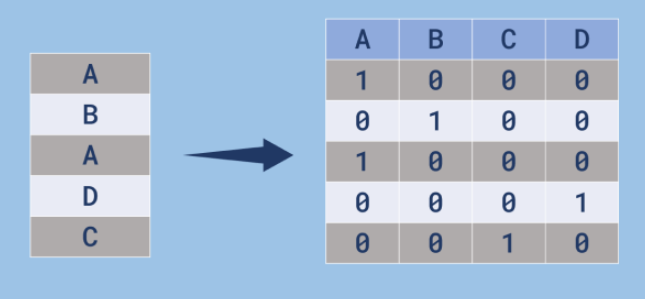

In [22]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [23]:
colunas = x.columns

In [24]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['estado_civil', 'escolaridade', 'inadimplencia', 'fez_emprestimo']
),
    remainder = 'passthrough',
    sparse_threshold=0)

In [25]:
x = one_hot.fit_transform(x)

In [26]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

In [27]:
pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


## Transformando a variável alvo

Assim como as variáveis explicativas, a variável alvo também precisa ser alterada para o formato numérico. Podemos representar uma variável alvo binária como 0 ou 1, onde 0 indica ausência da característica da variável e 1 representa a presença da característica.

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
label_ecoder = LabelEncoder()

In [30]:
y = label_ecoder.fit_transform(y)

In [31]:
y

array([1, 1, 0, ..., 1, 1, 1], shape=(1268,))

# Divisao do dataset em treino e teste

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state = 5, stratify=y)

### Modelo Base

Modelo mais simples de classificação ele simplesmente chuta todas as classificacoes pra classe que tem mais frequencia 

In [36]:
from sklearn.dummy import DummyClassifier

In [ ]:
#Inicializa o modelo
dummy = DummyClassifier()

#Faz o ajuste do modelo
dummy.fit(x_treino, y_treino) 

#Avalia o modelo
dummy.score(x_teste, y_teste)

0.6025236593059937

### Modelo de Árvore de decisão

In [38]:
#Arvore de decisao
from sklearn.tree import DecisionTreeClassifier

In [39]:
#Inicializa o modelo
arvore = DecisionTreeClassifier(random_state = 5)
#Faz o ajuste do modelo
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(random_state=5)

In [40]:
# podemos usar o modelo que foi treinado para testar novos dados
arvore.predict(x_teste)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [41]:
arvore.score(x_teste, y_teste)

0.6656151419558359

In [42]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [43]:
nome_colunas = ['casado', 'divorciado', 'solteiro', 'fundamental', 'medio', 'superior', 'inadimplencia', 'fez_emprestimo', 'idade', 'saldo', 'tempo_contato', 'num_contato']

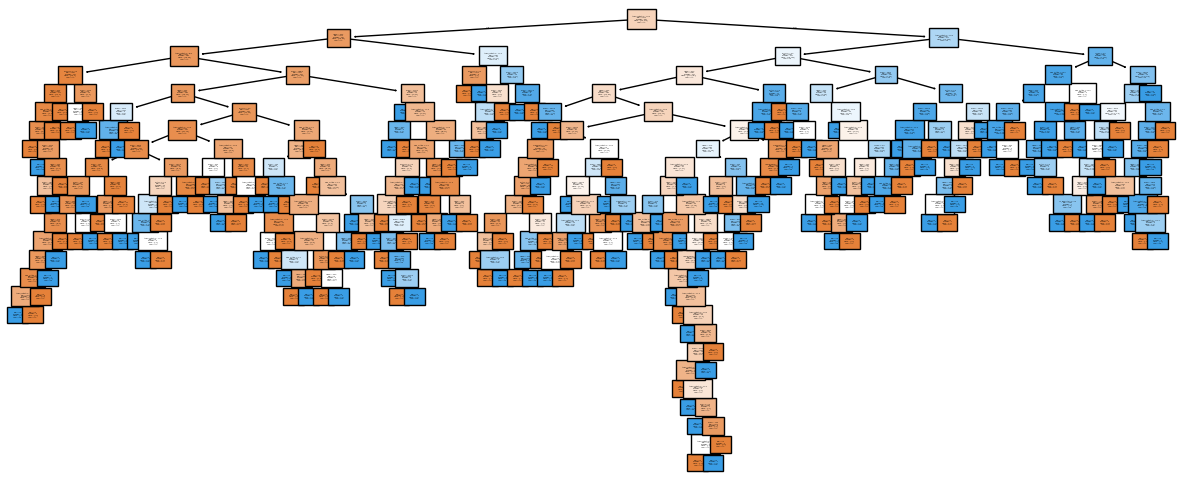

In [44]:
plt.figure(figsize=(15, 6))
plot_tree(arvore, filled=True, class_names=['não','sim'],fontsize=1, feature_names=nome_colunas);

In [45]:
arvore.score(x_treino, y_treino)

1.0

In [46]:
#Inicializa o modelo
arvore = DecisionTreeClassifier(max_depth=3,random_state = 5)
#Faz o ajuste do modelo
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [47]:
arvore.score(x_treino, y_treino)

0.7613038906414301

In [48]:
arvore.score(x_teste, y_teste)

0.7160883280757098

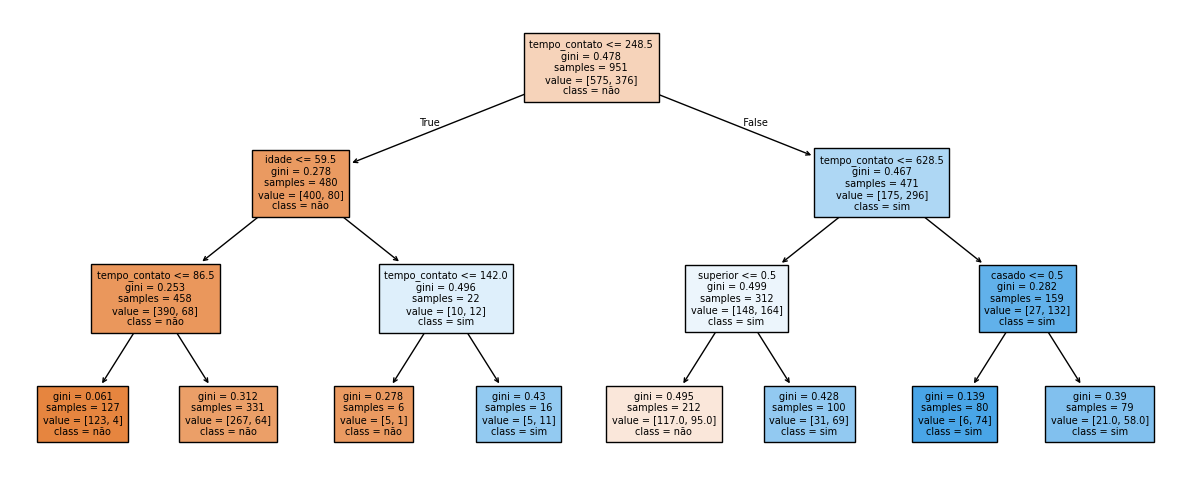

In [49]:
plt.figure(figsize=(15, 6))
plot_tree(arvore, filled=True, class_names=['não','sim'],fontsize=7, feature_names=nome_colunas);

### KNN